In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import diego as dg

### Cargar el archivo de mi ciudad

In [193]:
#Cargamos archivo en un nuevo dataset
df = dg.cargar_archivo('Porto.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,https://www.airbnb.com/rooms/41339,20250308054731,2025-03-09,city scrape,Porto city flat near the sea,Welcome to our apartment located near the sea ...,The apartment is close to the Serralves Founda...,https://a0.muscache.com/pictures/miso/Hosting-...,180050,https://www.airbnb.com/users/show/180050,Paula,2010-07-25,"Oporto, Portugal","Olá, sou a Paula e adoro a minha cidade!\r\nAd...",within a day,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/b2ec5...,https://a0.muscache.com/im/pictures/user/b2ec5...,NaN,27.0,29.0,"['email', 'phone']",t,t,"Porto, Portugal",Lordelo do Ouro e Massarelos,PORTO,41.15010,-8.66035,Entire rental unit,Entire home/apt,5,1.0,1 bath,1.0,3.0,"[""Hangers"", ""Books and reading material"", ""TV ...",$52.00,7,240,2,2,1125,1125,2.0,1125.0,NaN,t,27,57,87,201,2025-03-09,26,4,0,201,4,56,2912.0,2013-05-15,2024-09-24,4.73,4.73,4.85,4.88,4.85,4.62,4.69,29049/AL,f,1,1,0,0,0.18
1,55111,https://www.airbnb.com/rooms/55111,20250308054731,2025-03-09,previous scrape,Fontielas Houses |Floor1 in House with shared ...,Is the first floor in a villa with shared pool...,NaN,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,https://www.airbnb.com/users/show/259711,Isabel E João,2010-10-12,"Porto, Portugal",I am architect and I born in Paredes-Porto. I'...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/5f343...,https://a0.muscache.com/im/pictures/user/5f343...,NaN,3.0,3.0,"['email', 'phone']",t,t,NaN,Cete,PAREDES,41.17418,-8.35533,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,NaN,"[""Washer"", ""Hangers"", ""Baby safety gates"", ""Fi...",NaN,4,28,4,4,28,28,4.0,28.0,NaN,t,0,0,0,0,2025-03-09,20,1,0,0,1,8,NaN,2015-07-18,2024-08-14,4.80,4.80,4.75,4.90,4.90,4.79,4.79,7563/AL,f,3,3,0,0,0.17
2,73828,https://www.airbnb.com/rooms/73828,20250308054731,2025-03-09,previous scrape,Fontielas Houses |Floor0 in House with shared ...,Ground floor in a villa with shared pool and p...,NaN,https://a0.muscache.com/pictures/ffb19299-425c...,259711,https://www.airbnb.com/users/show/259711,Isabel E João,2010-10-12,"Porto, Portugal",I am architect and I born in Paredes-Porto. I'...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/5f343...,https://a0.muscache.com/im/pictures/user/5f343...,NaN,3.0,3.0,"['email', 'phone']",t,t,NaN,Cete,PAREDES,41.17622,-8.35351,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,NaN,"[""Washer"", ""Hangers"", ""First aid kit"", ""Oven"",...",NaN,5,28,4,4,28,28,4.0,28.0,NaN,t,0,0,0,0,2025-03-09,15,1,0,0,1,10,NaN,2015-05-09,2024-08-21,4.87,5.00,4.87,5.00,5.00,4.93,4.80,7563/AL,f,3,3,0,0,0.13
3,8

In [194]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

### 3. Acciones de preprocesamiento necesarias: Nulos y Outliers

In [195]:
#Convertimos las columnas de host_response_rate, price y host_acceptance_rate a float para su posterior análisis
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/6g/_xkwmvhx4_sg_spcn348_2wc0000gn/T/ipykernel_8489/1637394887.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [196]:
#Separamos las columnas en cuantitativas y cualitativas
cuantitativas = df.select_dtypes(include=['int64', 'float64'])
cualitativas = df.select_dtypes(include=['object','datetime64[ns]'])
#Sustituimos los valores nulos de las columnas cuantitativas con la constante 0
cuantitativas = dg.sust_constante(cuantitativas,0)
#Sustituimos los valores nulos de las columnas cualitativas relevantes para el análisis con la moda
# Sustituir nulos con la moda (valor más frecuente) en variables categóricas
df['host_is_superhost'] = df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0])
df['room_type'] = df['room_type'].fillna(df['room_type'].mode()[0])
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0])
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])
df['property_type'] = df['property_type'].fillna(df['property_type'].mode()[0])
df['has_availability'] = df['has_availability'].fillna(df['has_availability'].mode()[0])
df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].mode()[0])
#Sustituimos los valores nulos de las columnas cualitativas que no son relevantes para el análisis con el string 'nulo'
cualitativas_restantes = cualitativas.drop(columns=['host_is_superhost', 'room_type', 'host_has_profile_pic','host_identity_verified', 'property_type', 'has_availability', 'instant_bookable'])
cualitativas = dg.sust_string(cualitativas_restantes,'nulo')
cualitativas = pd.concat([cualitativas_restantes, df[['host_is_superhost', 'room_type', 'host_has_profile_pic','host_identity_verified', 'property_type', 'has_availability', 'instant_bookable']]], axis=1)
df = pd.concat([cualitativas, cuantitativas], axis=1)

In [197]:
#Confirmamos que se hayan sustituído todos los valores nulos
pd.set_option('display.max_rows', None)
dg.contar_nulos(df)

Nulos por columna: listing_url                                         0
last_scraped                                        0
source                                              0
name                                                0
description                                       330
neighborhood_overview                            5926
picture_url                                         0
host_url                                            0
host_name                                          18
host_since                                         20
host_location                                    4758
host_about                                       6852
host_response_time                               2447
host_thumbnail_url                                 20
host_picture_url                                   20
host_neighbourhood                              13433
host_verifications                                 20
neighbourhood                                    5926
neighbour

In [198]:
#Aplicamos método de rango intercuartílico para eliminar outliers
df = dg.sust_atipicos(df)

Nulos por columna: id                                              0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm         

/Users/diego/Desktop/IA II/Alfredy/Actividad2.1/diego.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualitativas = cualitativas_con_nulos.fillna(method='ffill')


In [199]:
df.dtypes

listing_url                                      object
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_thumbnail_url                               object
host_picture_url                                 object
host_neighbourhood                               object
host_verifications                               object
neighbourhood                                   

### 4. Analizar la correlación que existe en cada tipo de habitación respecto a la combinación de variables sugeridas

In [200]:
df['room_type'].value_counts()

room_type
Entire home/apt    11728
Private room        2414
Hotel room           116
Shared room          102
Name: count, dtype: int64

In [201]:
# Filtrando por cada tipo de room_type
df_entire_home = df[df['room_type'] == 'Entire home/apt']
df_private_room = df[df['room_type'] == 'Private room']
df_hotel_room = df[df['room_type'] == 'Hotel room']
df_shared_room = df[df['room_type'] == 'Shared room']

In [202]:
#Seleccionamos únicamente las variables cuantitativas para el análisis
df_entire_home = df_entire_home.select_dtypes(include=['int64', 'float64'])
df_private_room = df_private_room.select_dtypes(include=['int64', 'float64'])
df_hotel_room = df_hotel_room.select_dtypes(include=['int64', 'float64'])
df_shared_room = df_shared_room.select_dtypes(include=['int64', 'float64'])

### Entire home

In [203]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsEH=df_entire_home[['host_response_rate', 'host_acceptance_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication']].corr()
Corr_FactorsEH = abs(Corr_FactorsEH)
Corr_FactorsEH.head(9)

,host_response_rate,host_acceptance_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_response_rate,1.000000,0.019699,0.037682,0.020614,0.030738,0.049214,0.052069,0.002918,0.080564
host_acceptance_rate,0.019699,1.000000,0.008102,0.050642,0.035599,0.017321,0.022853,0.078204,0.018503
price,0.037682,0.008102,1.000000,0.031762,0.117132,0.117311,0.279040,0.058986,0.062490
number_of_reviews,0.020614,0.050642,0.031762,1.000000,0.057519,0.015146,0.013736,0.540488,0.047179
review_scores_location,0.030738,0.035599,0.117132,0.057519,1.000000,0.298809,0.004514,0.082974,0.276565
review_scores_cleanliness,0.049214,0.017321,0.117311,0.015146,0.298809,1.000000,0.046834,0.018325,0.493567
availability_365,0.052069,0.022853,0.279040,0.013736,0.004514,0.046834,1.000000,0.073147,0.072327
reviews_per_month,0.002918,0.078204,0.058986,0.540488,0.082974,0.018325,0.073147,1.000000,0.070545
review_scores_communication,0.080564,0.018503,0.062490,0.047179,0.276565,0.493567,0.072327,0.070545,1.000000


<Axes: >

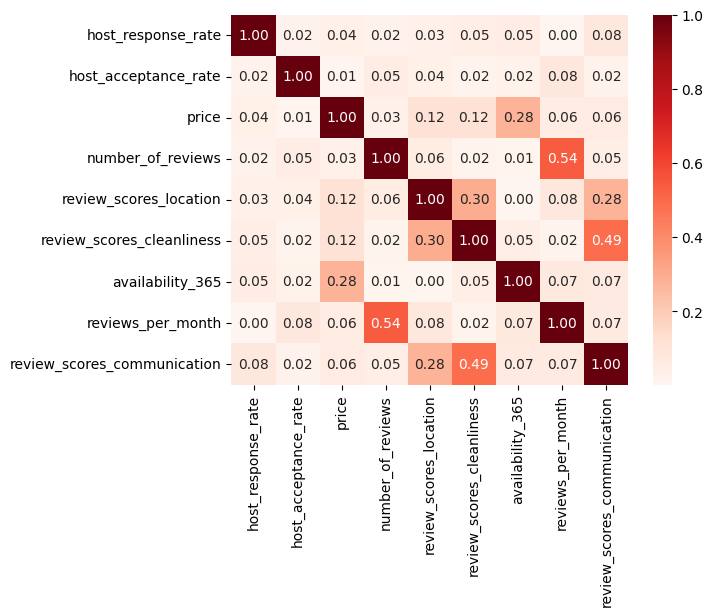

In [204]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_MapEH = sns.heatmap(Corr_FactorsEH, cmap= 'Reds', annot=True, fmt='.2f')
Heat_MapEH


Factores de correlación de los conjuntos de variables dependientes e independientes necesarios (Entire Home)

“host_acceptance_rate vs host_response_rate” = 0.02

“review_scores_location vs review_scores_cleanliness” = 0.30

“host_acceptance_rate vs price” = 0.01

“availability_365 vs number_of_reviews” = 0.01

“host_acceptance_rate vs number_of_reviews ” = 0.05

“reviews_per_month vs review_scores_communication” = 0.07

### Private room

In [205]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsPR=df_private_room[['host_response_rate', 'host_acceptance_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication']].corr()
Corr_FactorsPR = abs(Corr_FactorsPR)
Corr_FactorsPR.head(9)

,host_response_rate,host_acceptance_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_response_rate,1.000000,0.034524,0.022215,0.023334,0.053437,0.070741,0.078732,0.041789,0.054047
host_acceptance_rate,0.034524,1.000000,0.025291,0.004659,0.005256,0.023736,0.056654,0.021202,0.031355
price,0.022215,0.025291,1.000000,0.009610,0.041198,0.119055,0.491397,0.014050,0.025928
number_of_reviews,0.023334,0.004659,0.009610,1.000000,0.084050,0.032539,0.031992,0.597737,0.111654
review_scores_location,0.053437,0.005256,0.041198,0.084050,1.000000,0.305189,0.024548,0.070541,0.303093
review_scores_cleanliness,0.070741,0.023736,0.119055,0.032539,0.305189,1.000000,0.034051,0.052993,0.430873
availability_365,0.078732,0.056654,0.491397,0.031992,0.024548,0.034051,1.000000,0.094251,0.047114
reviews_per_month,0.041789,0.021202,0.014050,0.597737,0.070541,0.052993,0.094251,1.000000,0.148373
review_scores_communication,0.054047,0.031355,0.025928,0.111654,0.303093,0.430873,0.047114,0.148373,1.000000


<Axes: >

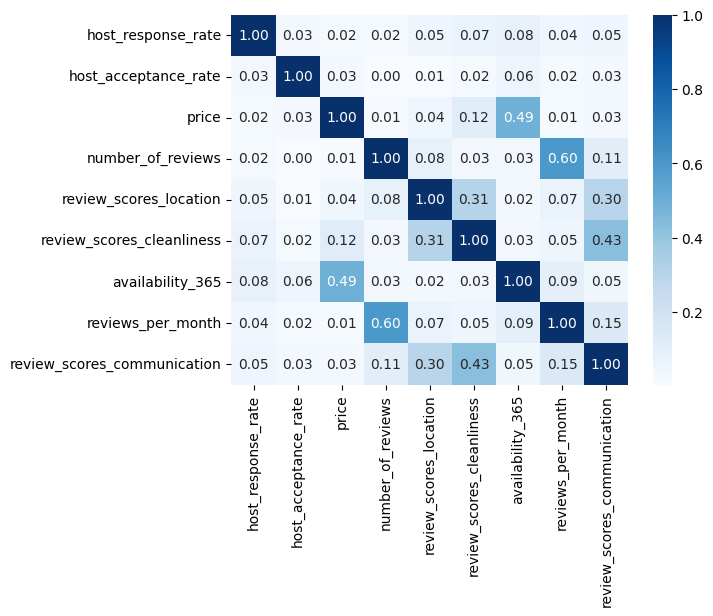

In [206]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_MapPR= sns.heatmap(Corr_FactorsPR, cmap= 'Blues', annot=True, fmt='.2f')
Heat_MapPR


Factores de correlación de los conjuntos de variables dependientes e independientes necesarios (Private Room)

“host_acceptance_rate vs host_response_rate” = 0.03

“review_scores_location vs review_scores_cleanliness” = 0.31

“host_acceptance_rate vs price” = 0.03

“availability_365 vs number_of_reviews” = 0.03

“host_acceptance_rate vs number_of_reviews ” = 0.0

“reviews_per_month vs review_scores_communication” = 0.15

### Hotel room

In [207]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsHR=df_hotel_room[['host_response_rate', 'host_acceptance_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication']].corr()
Corr_FactorsHR = abs(Corr_FactorsHR)
Corr_FactorsHR.head(9)

,host_response_rate,host_acceptance_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_response_rate,1.000000,0.081701,0.292759,0.139220,0.036295,0.149185,0.393011,0.113246,0.008709
host_acceptance_rate,0.081701,1.000000,0.314788,0.072430,0.005422,0.101984,0.105479,0.029751,0.125555
price,0.292759,0.314788,1.000000,0.037928,0.223252,0.156594,0.343890,0.003590,0.000951
number_of_reviews,0.139220,0.072430,0.037928,1.000000,0.044783,0.135362,0.096301,0.754369,0.310889
review_scores_location,0.036295,0.005422,0.223252,0.044783,1.000000,0.369578,0.134710,0.027866,0.431609
review_scores_cleanliness,0.149185,0.101984,0.156594,0.135362,0.369578,1.000000,0.099132,0.149897,0.424052
availability_365,0.393011,0.105479,0.343890,0.096301,0.134710,0.099132,1.000000,0.127165,0.002718
reviews_per_month,0.113246,0.029751,0.003590,0.754369,0.027866,0.149897,0.127165,1.000000,0.323604
review_scores_communication,0.008709,0.125555,0.000951,0.310889,0.431609,0.424052,0.002718,0.323604,1.000000


<Axes: >

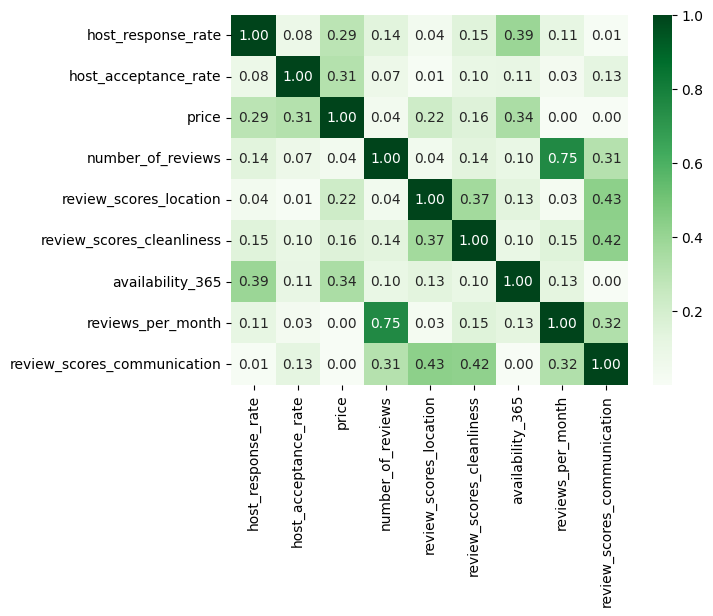

In [208]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_MapHR= sns.heatmap(Corr_FactorsHR, cmap= 'Greens', annot=True, fmt='.2f')
Heat_MapHR


Factores de correlación de los conjuntos de variables dependientes e independientes necesarios (Hotel Room)

“host_acceptance_rate vs host_response_rate” = 0.08

“review_scores_location vs review_scores_cleanliness” = 0.37

“host_acceptance_rate vs price” = 0.31

“availability_365 vs number_of_reviews” = 0.10

“host_acceptance_rate vs number_of_reviews ” = 0.07

“reviews_per_month vs review_scores_communication” = 0.32

### Shared room

In [209]:
#Encontramos todas las correlaciones entre las variables
Corr_FactorsSR=df_shared_room[['host_response_rate', 'host_acceptance_rate', 'price', 'number_of_reviews', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'reviews_per_month', 'review_scores_communication']].corr()
Corr_FactorsSR = abs(Corr_FactorsSR)
Corr_FactorsSR.head(9)

,host_response_rate,host_acceptance_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
host_response_rate,1.000000,0.022858,0.052194,0.060492,0.016328,0.285830,0.082925,0.074274,0.291224
host_acceptance_rate,0.022858,1.000000,0.078222,0.097139,0.012784,0.079641,0.051632,0.219496,0.073397
price,0.052194,0.078222,1.000000,0.134062,0.000880,0.095495,0.398828,0.076010,0.090028
number_of_reviews,0.060492,0.097139,0.134062,1.000000,0.024045,0.191187,0.152267,0.683519,0.108668
review_scores_location,0.016328,0.012784,0.000880,0.024045,1.000000,0.309793,0.000881,0.011543,0.224294
review_scores_cleanliness,0.285830,0.079641,0.095495,0.191187,0.309793,1.000000,0.121275,0.197658,0.589460
availability_365,0.082925,0.051632,0.398828,0.152267,0.000881,0.121275,1.000000,0.077785,0.181925
reviews_per_month,0.074274,0.219496,0.076010,0.683519,0.011543,0.197658,0.077785,1.000000,0.139291
review_scores_communication,0.291224,0.073397,0.090028,0.108668,0.224294,0.589460,0.181925,0.139291,1.000000


<Axes: >

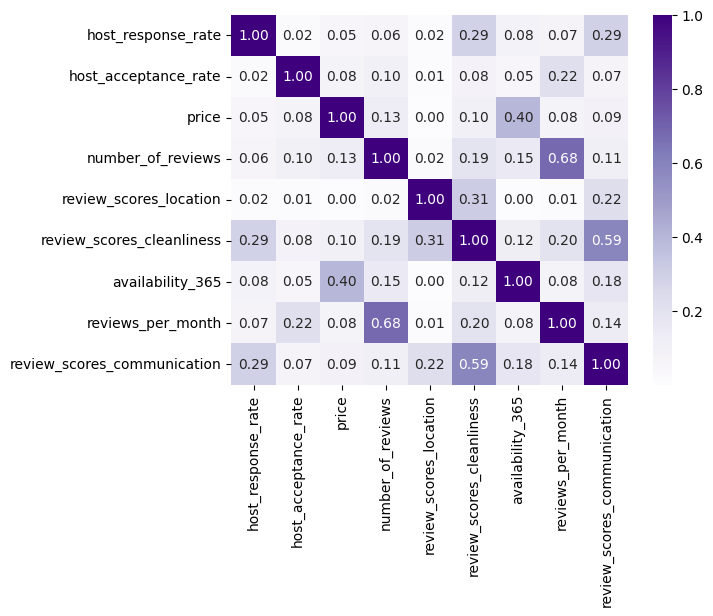

In [210]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_MapSR= sns.heatmap(Corr_FactorsSR, cmap= 'Purples', annot=True, fmt='.2f')
Heat_MapSR


Factores de correlación de los conjuntos de variables dependientes e independientes necesarios (Shared Room)

“host_acceptance_rate vs host_response_rate” = 0.02

“review_scores_location vs review_scores_cleanliness” = 0.31

“host_acceptance_rate vs price” = 0.08

“availability_365 vs number_of_reviews” = 0.15

“host_acceptance_rate vs number_of_reviews ” = 0.10

“reviews_per_month vs review_scores_communication” = 0.14

In [211]:
#Generamos una tabla con los valores encontrados según los 4 tipos de cuartos.
datos_correlacion = {
    "Variables comparadas": [
        "host_acceptance_rate vs host_response_rate",
        "review_scores_location vs review_scores_cleanliness",
        "host_acceptance_rate vs price",
        "availability_365 vs number_of_reviews",
        "host_acceptance_rate vs number_of_reviews",
        "reviews_per_month vs review_scores_communication"
    ],
    "Entire Home": [0.02, 0.30, 0.01, 0.01, 0.05, 0.07],
    "Private Room": [0.03, 0.31, 0.03, 0.03, 0.00, 0.15],
    "Hotel Room": [0.08, 0.37, 0.31, 0.10, 0.07, 0.32],
    "Shared Room": [0.02, 0.31, 0.08, 0.15, 0.10, 0.14],
}
df_correlacion = pd.DataFrame(datos_correlacion)
df_correlacion

,Variables comparadas,Entire Home,Private Room,Hotel Room,Shared Room
0,host_acceptance_rate vs host_response_rate,0.02,0.03,0.08,0.02
1,review_scores_location vs review_scores_cleanl...,0.30,0.31,0.37,0.31
2,host_acceptance_rate vs price,0.01,0.03,0.31,0.08
3,availability_365 vs number_of_reviews,0.01,0.03,0.10,0.15
4,host_acceptance_rate vs number_of_reviews,0.05,0.00,0.07,0.10
5,reviews_per_month vs review_scores_communication,0.07,0.15,0.32,0.14


### 5. Crear el modelo matemático con la mayor correlación para cada tipo de alojamiento elegido.

#### Entire Home

In [212]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_DepEH= df_entire_home['number_of_reviews']
Vars_IndepEH= df_entire_home[['reviews_per_month']]

#Se define modelEH como la función  de regresión lineal

from sklearn.linear_model import LinearRegression
modelEH= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelEH.fit(X=Vars_IndepEH, y=Var_DepEH)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelEH.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([20.84042845]),
 'rank_': 1,
 'singular_': array([142.16843009]),
 'intercept_': np.float64(17.08358051899713)}

In [213]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterEH= modelEH.score(X=Vars_IndepEH, y=Var_DepEH)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelEH=np.sqrt(coef_DeterEH)
print('Coeficiente de Determinación: ',coef_DeterEH)
print('Coeficiente de Correlación: ',coef_CorrelEH)

Coeficiente de Determinación:  0.29212684462948624
Coeficiente de Correlación:  0.5404875989599449


**Modelo matemático: y = 20.84042845x + 17.08358051899713**

#### Private Room

In [214]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepPR= df_private_room[['number_of_reviews']]
Var_DepPR= df_private_room['reviews_per_month']

#Se define modelEH como la función  de regresión lineal

from sklearn.linear_model import LinearRegression
modelPR= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelPR.fit(X=Vars_IndepPR, y=Var_DepPR)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01598904]),
 'rank_': 1,
 'singular_': array([1946.46880792]),
 'intercept_': np.float64(0.36692179809869035)}

In [215]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterPR= modelPR.score(X=Vars_IndepPR, y=Var_DepPR)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelPR=np.sqrt(coef_DeterPR)
print('Coeficiente de Determinación: ',coef_DeterPR)
print('Coeficiente de Correlación: ',coef_CorrelPR)

Coeficiente de Determinación:  0.35728981192187925
Coeficiente de Correlación:  0.5977372432113288


**Modelo matemático: y = 0.01598904x + 0.36692179809869035**

#### Hotel Room

In [216]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepHR= df_hotel_room[['number_of_reviews']]
Var_DepHR= df_hotel_room['reviews_per_month']

#Se define modelEH como la función  de regresión lineal

from sklearn.linear_model import LinearRegression
modelHR= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelHR.fit(X=Vars_IndepHR, y=Var_DepHR)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelHR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01484072]),
 'rank_': 1,
 'singular_': array([178.25753841]),
 'intercept_': np.float64(0.01638343271422278)}

In [217]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterHR= modelHR.score(X=Vars_IndepHR, y=Var_DepHR)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelHR=np.sqrt(coef_DeterHR)
print('Coeficiente de Determinación: ',coef_DeterHR)
print('Coeficiente de Correlación: ',coef_CorrelHR)

Coeficiente de Determinación:  0.5690720158391189
Coeficiente de Correlación:  0.754368620661755


**Modelo matemático: y = 0.01484072x + 0.01638343271422278**

#### Shared Room

In [218]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepSR= df_shared_room[['number_of_reviews']]
Var_DepSR= df_shared_room['reviews_per_month']

#Se define modelEH como la función  de regresión lineal

from sklearn.linear_model import LinearRegression
modelSR= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelSR.fit(X=Vars_IndepSR, y=Var_DepSR)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelSR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01754182]),
 'rank_': 1,
 'singular_': array([303.58576008]),
 'intercept_': np.float64(0.2291584361264406)}

In [219]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterSR= modelSR.score(X=Vars_IndepSR, y=Var_DepSR)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelSR=np.sqrt(coef_DeterSR)
print('Coeficiente de Determinación: ',coef_DeterSR)
print('Coeficiente de Correlación: ',coef_CorrelSR)

Coeficiente de Determinación:  0.4671983443696871
Coeficiente de Correlación:  0.6835190885188848


**Modelo matemático: y = 0.01754182x + 0.2291584361264406**

### 6. Tabla de los 10 coeficientes de determinación y correlación mas altos, obtenidos para cada tipo de habitación elegido.

In [220]:
#Generar la tabla de los 10 coeficientes de correlación más altos por cada tipo de cuarto
top10_correlacion = [
    ("Entire Home", "review_scores_cleanliness vs review_scores_communication", 0.49),
    ("Entire Home", "reviews_per_month vs number_of_reviews", 0.54),
    ("Entire Home", "review_scores_location vs review_scores_cleanliness", 0.30),
    ("Entire Home", "price vs availability_365", 0.28),
    ("Entire Home", "review_scores_location vs review_scores_communication", 0.28),
    ("Entire Home", "review_scores_cleanliness vs price", 0.12),
    ("Entire Home", "availability_365 vs price", 0.28),
    ("Entire Home", "price vs review_scores_location", 0.12),
    ("Entire Home", "review_scores_cleanliness vs availability_365", 0.05),
    ("Entire Home", "review_scores_location vs availability_365", 0.30),

    ("Private Room", "reviews_per_month vs number_of_reviews", 0.60),
    ("Private Room", "price vs availability_365", 0.49),
    ("Private Room", "review_scores_cleanliness vs review_scores_communication", 0.43),
    ("Private Room", "review_scores_location vs review_scores_cleanliness", 0.31),
    ("Private Room", "review_scores_location vs review_scores_communication", 0.30),
    ("Private Room", "availability_365 vs price", 0.49),
    ("Private Room", "review_scores_cleanliness vs price", 0.12),
    ("Private Room", "review_scores_cleanliness vs review_scores_location", 0.31),
    ("Private Room", "reviews_per_month vs review_scores_communication", 0.15),
    ("Private Room", "review_scores_communication vs review_scores_location", 0.30),

    ("Hotel Room", "reviews_per_month vs number_of_reviews", 0.75),
    ("Hotel Room", "review_scores_location vs review_scores_cleanliness", 0.37),
    ("Hotel Room", "review_scores_cleanliness vs review_scores_communication", 0.42),
    ("Hotel Room", "review_scores_communication vs review_scores_location", 0.43),
    ("Hotel Room", "review_scores_communication vs number_of_reviews", 0.31),
    ("Hotel Room", "review_scores_cleanliness vs availability_365", 0.15),
    ("Hotel Room", "availability_365 vs price", 0.34),
    ("Hotel Room", "review_scores_location vs availability_365", 0.13),
    ("Hotel Room", "host_acceptance_rate vs price", 0.31),
    ("Hotel Room", "price vs review_scores_location", 0.22),

    ("Shared Room", "review_scores_cleanliness vs review_scores_communication", 0.59),
    ("Shared Room", "reviews_per_month vs number_of_reviews", 0.68),
    ("Shared Room", "availability_365 vs price", 0.40),
    ("Shared Room", "review_scores_cleanliness vs review_scores_location", 0.31),
    ("Shared Room", "review_scores_communication vs availability_365", 0.59),
    ("Shared Room", "review_scores_communication vs review_scores_location", 0.22),
    ("Shared Room", "review_scores_cleanliness vs price", 0.10),
    ("Shared Room", "review_scores_cleanliness vs availability_365", 0.12),
    ("Shared Room", "number_of_reviews vs availability_365", 0.15),
    ("Shared Room", "host_response_rate vs review_scores_cleanliness", 0.29)
]

# Crear DataFrame a partir de la lista
df_top10 = pd.DataFrame(top10_correlacion, columns=["Tipo de habitación", "Variables comparadas", "Coef. Correlación"])
# Mostrar la tabla
print(df_top10)

   Tipo de habitación                               Variables comparadas  \
0         Entire Home  review_scores_cleanliness vs review_scores_com...   
1         Entire Home             reviews_per_month vs number_of_reviews   
2         Entire Home  review_scores_location vs review_scores_cleanl...   
3         Entire Home                          price vs availability_365   
4         Entire Home  review_scores_location vs review_scores_commun...   
5         Entire Home                 review_scores_cleanliness vs price   
6         Entire Home                          availability_365 vs price   
7         Entire Home                    price vs review_scores_location   
8         Entire Home      review_scores_cleanliness vs availability_365   
9         Entire Home         review_scores_location vs availability_365   
10       Private Room             reviews_per_month vs number_of_reviews   
11       Private Room                          price vs availability_365   
12       Pri

### 7. Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: 

#### Convertimos las variables categóricas ordinales relevantes para el análisis a numéricas respecto a su frecuencia

In [221]:
ordinales = ['host_is_superhost','room_type','host_has_profile_pic','host_identity_verified','property_type','has_availability','instant_bookable']
df1 = df.copy()
for col in ordinales:
    frecuencia = df[col].value_counts().index #value_counts() cuenta la frecuencia de cada valor en la columna y los ordena de mayor a menor.
    df1[col] = df[col].apply(lambda x: frecuencia.get_loc(x) + 1) #Para cada valor en la columna, buscamos su posición en freq_order y asignamos un número
                                                                  #consecutivo empezando desde 1. apply() aplica una operación a cada elemento de la columna.
                                                                  #frecuencia.get_loc(x): Devuelve el índice del valor x dentro de frecuencia.
                                                                  #Se suma 1 para que los números comiencen desde 1 en lugar de 0.
                                                                  #lambda x será la función que hace la siguiente operación.
pd.set_option('display.max_columns', None)
df1.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,bathrooms_text,amenities,calendar_last_scraped,first_review,last_review,license,host_is_superhost,room_type,host_has_profile_pic,host_identity_verified,property_type,has_availability,instant_bookable,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/41339,2025-03-09,city scrape,Porto city flat near the sea,Welcome to our apartment located near the sea ...,The apartment is close to the Serralves Founda...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/180050,Paula,2010-07-25,"Oporto, Portugal","Olá, sou a Paula e adoro a minha cidade!\r\nAd...",within a day,https://a0.muscache.com/im/pictures/user/b2ec5...,https://a0.muscache.com/im/pictures/user/b2ec5...,NaN,"['email', 'phone']","Porto, Portugal",Lordelo do Ouro e Massarelos,PORTO,1 bath,"[""Hangers"", ""Books and reading material"", ""TV ...",2025-03-09,2013-05-15,2024-09-24,29049/AL,1,1,1,1,1,1,2,41339,180050,100.0,100.0,27.0,29.0,41.15010,-8.60000,5.0,1.0,3.0,52.0,1.7,240,2.0,2.0,1125.0,1125.0,2.0,1125.0,27,57,87,201,26.0,4.0,0.0,201,4.0,56,2912.0,4.73,4.73,4.85,4.88,4.85,4.62,4.69,1.0,1.0,0.0,0.18
1,https://www.airbnb.com/rooms/55111,2025-03-09,previous scrape,Fontielas Houses |Floor1 in House with shared ...,Is the first floor in a villa with shared pool...,The apartment is close to the Serralves Founda...,https://a0.muscache.com/pictures/b3c38006-5fdf...,https://www.airbnb.com/users/show/259711,Isabel E João,2010-10-12,"Porto, Portugal",I am architect and I born in Paredes-Porto. I'...,within a day,https://a0.muscache.com/im/pictures/user/5f343...,https://a0.muscache.com/im/pictures/user/5f343...,NaN,"['email', 'phone']","Porto, Portugal",Cete,PAREDES,1 bath,"[""Washer"", ""Hangers"", ""Baby safety gates"", ""Fi...",2025-03-09,2015-07-18,2024-08-14,7563/AL,1,1,1,1,1,1,2,55111,259711,99.9,100.0,3.0,3.0,41.17418,-8.60000,5.0,2.0,0.0,0.0,1.7,28,1.6,4.0,28.0,28.0,4.0,28.0,0,0,0,0,20.0,1.0,0.0,0,1.0,8,0.0,4.80,4.80,4.75,4.90,4.90,4.79,4.79,3.0,3.0,0.0,0.17
2,https://www.airbnb.com/rooms/73828,2025-03-09,previous scrape,Fontielas Houses |Floor0 in House with shared ...,Ground floor in a villa with shared pool and p...,The apartment is close to the Serralves Founda...,https://a0.muscache.com/pictures/ffb19299-425c...,https://www.airbnb.com/users/show/259711,Isabel E João,2010-10-12,"Porto, Portugal",I am architect and I born in Paredes-Porto. I'...,within a day,https://a0.muscache.com/im/pictures/user/5f343...,https://a0.muscache.com/im/pictures/user/5f343...,NaN,"['email', 'phone']","Porto, Portugal",Cete,PAREDES,1 bath,"[""Washer"", ""Hangers"", ""First aid kit"", ""Oven"",...",2025-03-09,2015-05-09,2024-08-21,7563/AL,1,1,1,1,1,1,2,73828,259711,99.9,100.0,3.0,3.0,41.17622,-8.60000,5.0,2.0,0.0,0.0,1.7,28,1.6,4.0,28.0,28.0,4.0,28.0,0,0,0,0,15.0,1.0,0.0,0,1.0,10,0.0,4.87,5.00,4.87,5.00,5.00,4.93,4.80,3.0,3.0,0.0,0.13
3,https://www.airbnb.com/rooms/878

#### host_id

In [248]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepID= df1[['review_scores_communication', 'review_scores_checkin', 'number_of_reviews_l30d', 'review_scores_accuracy', 'review_scores_cleanliness']]
Var_DepID= df['host_id']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelID= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
modelID.fit(X=Vars_IndepID, y=Var_DepID)
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelID.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'review_scores_checkin',
        'number_of_reviews_l30d', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-88450200.34650277, -35551753.01647837,  15908205.62368463,
        -35875817.8292134 ,   8534962.21889398]),
 'rank_': 5,
 'singular_': array([68.04356131, 33.17985827, 16.43062063, 12.43893465, 11.02032819]),
 'intercept_': np.float64(960054928.8849881)}

In [250]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_host_id = modelID.score(X=Vars_IndepID, y=Var_DepID)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_host_id = np.sqrt(coef_Deter_host_id)
print("Coeficiente de Determinación para host_id: ", coef_Deter_host_id)
print("Coeficiente de Correlación para host_id: ", coef_Correl_host_id)

Coeficiente de Determinación para host_id:  0.011634667430870937
Coeficiente de Correlación para host_id:  0.10786411558470656


#### host_acceptance_rate

In [246]:
# Modelo de regresión lineal múltiple para: host_acceptance_rate
Vars_Indep_host_acceptance_rate = df1[['host_response_rate', 'instant_bookable', 'host_identity_verified', 'review_scores_rating', 'property_type']]
Var_Dep_host_acceptance_rate = df1['host_acceptance_rate']

model_host_acceptance_rate = LinearRegression()
model_host_acceptance_rate.fit(X=Vars_Indep_host_acceptance_rate, y=Var_Dep_host_acceptance_rate)

model_host_acceptance_rate.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'instant_bookable', 'host_identity_verified',
        'review_scores_rating', 'property_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.04980507, -0.39728888, -0.00625275, -0.01702534, -0.00672003]),
 'rank_': 5,
 'singular_': array([826.91797994,  58.68488362,  55.12140832,  31.72844542,
         25.41355689]),
 'intercept_': np.float64(95.04684046957615)}

In [247]:
coef_Deter_host_acceptance_rate = model_host_acceptance_rate.score(X=Vars_Indep_host_acceptance_rate, y=Var_Dep_host_acceptance_rate)
coef_Correl_host_acceptance_rate = np.sqrt(coef_Deter_host_acceptance_rate)

print("Coeficiente de Determinación para host_acceptance_rate: ", coef_Deter_host_acceptance_rate)
print("Coeficiente de Correlación para host_acceptance_rate: ", coef_Correl_host_acceptance_rate)

Coeficiente de Determinación para host_acceptance_rate:  0.022706956080962404
Coeficiente de Correlación para host_acceptance_rate:  0.1506882745304438


#### host_is_superhost

In [251]:
# Modelo de regresión lineal múltiple para: host_is_superhost
Vars_Indep_host_is_superhost = df1[['host_response_rate', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'review_scores_accuracy']]
Var_Dep_host_is_superhost = df1['host_is_superhost']

model_host_is_superhost = LinearRegression()
model_host_is_superhost.fit(X=Vars_Indep_host_is_superhost, y=Var_Dep_host_is_superhost)

model_host_is_superhost.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'host_has_profile_pic',
        'host_identity_verified', 'instant_bookable',
        'review_scores_accuracy'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.06107696, -0.1851923 , -0.23290749, -0.02526481,  0.86958264]),
 'rank_': 5,
 'singular_': array([58.85978789, 55.27589494, 31.45828384, 19.14722131, 14.79719048]),
 'intercept_': np.float64(-8.462112231614233)}

In [252]:
coef_Deter_host_is_superhost = model_host_is_superhost.score(X=Vars_Indep_host_is_superhost, y=Var_Dep_host_is_superhost)
coef_Correl_host_is_superhost = np.sqrt(coef_Deter_host_is_superhost)

print("Coeficiente de Determinación para host_is_superhost: ", coef_Deter_host_is_superhost)
print("Coeficiente de Correlación para host_is_superhost: ", coef_Correl_host_is_superhost)

Coeficiente de Determinación para host_is_superhost:  0.11645563854651964
Coeficiente de Correlación para host_is_superhost:  0.3412559721770736


#### host_total_listings_count

In [253]:
# Modelo de regresión lineal múltiple para: host_total_listings_count
Vars_Indep_host_total_listings_count = df1[['host_acceptance_rate', 'property_type', 'room_type', 'instant_bookable', 'accommodates']]
Var_Dep_host_total_listings_count = df1['host_total_listings_count']

model_host_total_listings_count = LinearRegression()
model_host_total_listings_count.fit(X=Vars_Indep_host_total_listings_count, y=Var_Dep_host_total_listings_count)

model_host_total_listings_count.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'property_type', 'room_type',
        'instant_bookable', 'accommodates'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-0.00814256, -0.03823009,  1.37738192, -2.97973445, -0.67665794]),
 'rank_': 5,
 'singular_': array([827.68666491, 160.69371408, 156.88905637,  55.69700424,
         46.40690417]),
 'intercept_': np.float64(13.974178140882632)}

In [254]:
coef_Deter_host_total_listings_count = model_host_total_listings_count.score(X=Vars_Indep_host_total_listings_count, y=Var_Dep_host_total_listings_count)
coef_Correl_host_total_listings_count = np.sqrt(coef_Deter_host_total_listings_count)

print("Coeficiente de Determinación para host_total_listings_count: ", coef_Deter_host_total_listings_count)
print("Coeficiente de Correlación para host_total_listings_count: ", coef_Correl_host_total_listings_count)

Coeficiente de Determinación para host_total_listings_count:  0.0382933311010939
Coeficiente de Correlación para host_total_listings_count:  0.19568681892527637


#### room_type

In [244]:
# Modelo de regresión lineal múltiple para: room_type
Vars_Indep_room_type = df1[['property_type', 'accommodates', 'price', 'instant_bookable', 'review_scores_value']]
Var_Dep_room_type = df1['room_type']

model_room_type = LinearRegression()
model_room_type.fit(X=Vars_Indep_room_type, y=Var_Dep_room_type)

model_room_type.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type', 'accommodates', 'price', 'instant_bookable',
        'review_scores_value'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.02841972, -0.08891604, -0.00195474,  0.02678553,  0.02658969]),
 'rank_': 5,
 'singular_': array([4351.69355968,  822.67014386,  151.97541724,   55.45041399,
          25.8509196 ]),
 'intercept_': np.float64(1.3354025053298288)}

In [245]:
coef_Deter_room_type = model_room_type.score(X=Vars_Indep_room_type, y=Var_Dep_room_type)
coef_Correl_room_type = np.sqrt(coef_Deter_room_type)

print("Coeficiente de Determinación para room_type: ", coef_Deter_room_type)
print("Coeficiente de Correlación para room_type: ", coef_Correl_room_type)

Coeficiente de Determinación para room_type:  0.3284073754463126
Coeficiente de Correlación para room_type:  0.5730683863609234


#### accommodates

In [255]:
# Modelo de regresión lineal múltiple para: accommodates
Vars_Indep_accommodates = df1[['bedrooms', 'price', 'property_type', 'room_type', 'review_scores_value']]
Var_Dep_accommodates = df1['accommodates']

model_accommodates = LinearRegression()
model_accommodates.fit(X=Vars_Indep_accommodates, y=Var_Dep_accommodates)

model_accommodates.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'price', 'property_type', 'room_type',
        'review_scores_value'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.98025173,  0.00284137,  0.00264184, -0.67692868, -0.0700796 ]),
 'rank_': 5,
 'singular_': array([4351.52642925,  822.85609646,   88.85388177,   47.78109846,
          25.96416947]),
 'intercept_': np.float64(2.9798885174682854)}

In [256]:
coef_Deter_accommodates = model_accommodates.score(X=Vars_Indep_accommodates, y=Var_Dep_accommodates)
coef_Correl_accommodates = np.sqrt(coef_Deter_accommodates)

print("Coeficiente de Determinación para accommodates: ", coef_Deter_accommodates)
print("Coeficiente de Correlación para accommodates: ", coef_Correl_accommodates)

Coeficiente de Determinación para accommodates:  0.46038636199717187
Coeficiente de Correlación para accommodates:  0.678517768372481


#### bedrooms

In [257]:
# Modelo de regresión lineal múltiple para: bedrooms
Vars_Indep_bedrooms = df1[['accommodates', 'price', 'review_scores_rating', 'review_scores_cleanliness', 'room_type']]
Var_Dep_bedrooms = df1['bedrooms']

model_bedrooms = LinearRegression()
model_bedrooms.fit(X=Vars_Indep_bedrooms, y=Var_Dep_bedrooms)

model_bedrooms.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'price', 'review_scores_rating',
        'review_scores_cleanliness', 'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.35767789,  0.00235684, -0.01256842,  0.08868235,  0.11749967]),
 'rank_': 5,
 'singular_': array([4350.87358128,  153.89168393,   51.58675703,   32.95069661,
          15.42757922]),
 'intercept_': np.float64(-0.5804915191856308)}

In [258]:
coef_Deter_bedrooms = model_bedrooms.score(X=Vars_Indep_bedrooms, y=Var_Dep_bedrooms)
coef_Correl_bedrooms = np.sqrt(coef_Deter_bedrooms)

print("Coeficiente de Determinación para bedrooms: ", coef_Deter_bedrooms)
print("Coeficiente de Correlación para bedrooms: ", coef_Correl_bedrooms)

Coeficiente de Determinación para bedrooms:  0.40861397651965126
Coeficiente de Correlación para bedrooms:  0.6392292049958694


#### Price

In [263]:
# Modelo de regresión lineal múltiple para: price
Vars_Indep_price = df1[['accommodates', 'bedrooms', 'room_type', 'property_type', 'review_scores_value']]
Var_Dep_price = df1['price']

model_price = LinearRegression()
model_price.fit(X=Vars_Indep_price, y=Var_Dep_price)

model_price.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'room_type', 'property_type',
        'review_scores_value'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  3.32604087,   7.7624406 , -16.08937315,   0.09096483,
         14.54662861]),
 'rank_': 5,
 'singular_': array([827.63821518, 171.68240461,  66.94289706,  46.50621971,
         26.078971  ]),
 'intercept_': np.float64(-9.161029865348716)}

In [264]:
coef_Deter_price = model_price.score(X=Vars_Indep_price, y=Var_Dep_price)
coef_Correl_price = np.sqrt(coef_Deter_price)

print("Coeficiente de Determinación para price: ", coef_Deter_price)
print("Coeficiente de Correlación para price: ", coef_Correl_price)

Coeficiente de Determinación para price:  0.1441304538729441
Coeficiente de Correlación para price:  0.3796451683782425


#### review_scores_value

In [234]:
# Modelo de regresión lineal múltiple para: review_scores_value
Vars_Indep_review_scores_value = df1[['review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_location', 'review_scores_cleanliness']]
Var_Dep_review_scores_value = df1['review_scores_value']

model_review_scores_value = LinearRegression()
model_review_scores_value.fit(X=Vars_Indep_review_scores_value, y=Var_Dep_review_scores_value)

model_review_scores_value.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_checkin', 'review_scores_location',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.43115297, 0.27294138, 0.05643722, 0.13224841, 0.11526316]),
 'rank_': 5,
 'singular_': array([40.05566871, 22.56082025, 15.65898027, 14.12112573, 11.62093334]),
 'intercept_': np.float64(-0.11447370928981915)}

In [235]:
coef_Deter_review_scores_value = model_review_scores_value.score(X=Vars_Indep_review_scores_value, y=Var_Dep_review_scores_value)
coef_Correl_review_scores_value = np.sqrt(coef_Deter_review_scores_value)

print("Coeficiente de Determinación para review_scores_value: ", coef_Deter_review_scores_value)
print("Coeficiente de Correlación para review_scores_value: ", coef_Correl_review_scores_value)

Coeficiente de Determinación para review_scores_value:  0.5721341685473614
Coeficiente de Correlación para review_scores_value:  0.7563955106605019


#### reviews_per_month

In [267]:
# Modelo de regresión lineal múltiple para: reviews_per_month
Vars_Indep_reviews_per_month = df1[['number_of_reviews_l30d', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_accuracy', 'room_type']]
Var_Dep_reviews_per_month = df1['reviews_per_month']

model_reviews_per_month = LinearRegression()
model_reviews_per_month.fit(X=Vars_Indep_reviews_per_month, y=Var_Dep_reviews_per_month)

model_reviews_per_month.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_l30d', 'review_scores_value',
        'review_scores_cleanliness', 'review_scores_accuracy', 'room_type'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.87925064,  0.71341002, -0.36738764, -0.28744777, -0.40380286]),
 'rank_': 5,
 'singular_': array([69.02569334, 55.2749228 , 35.69621134, 16.96537381, 12.538526  ]),
 'intercept_': np.float64(1.2736614255126193)}

In [268]:
coef_Deter_reviews_per_month = model_reviews_per_month.score(X=Vars_Indep_reviews_per_month, y=Var_Dep_reviews_per_month)
coef_Correl_reviews_per_month = np.sqrt(coef_Deter_reviews_per_month)

print("Coeficiente de Determinación para reviews_per_month: ", coef_Deter_reviews_per_month)
print("Coeficiente de Correlación para reviews_per_month: ", coef_Correl_reviews_per_month)

Coeficiente de Determinación para reviews_per_month:  0.19683210741456836
Coeficiente de Correlación para reviews_per_month:  0.4436576466314633
